In [1]:
data = Import["C:/Users/crist/OneDrive/Documentos/Redes/Redes/DataScience-Salaries/tables/salaries_2020-2025(clean).csv", "CSV"];
groupedData = Import["C:/Users/crist/OneDrive/Documentos/Redes/Redes/DataScience-Salaries/tables/salaries_2020-2025(grouped_log(128)).csv", "CSV"];

In [3]:
data = Rest[data];
groupedData = Rest[groupedData];

In [5]:
graph1 = Graph[UndirectedEdge @@@ data];
graph2 = Graph[UndirectedEdge @@@ groupedData];

In [16]:
AdjacencyList[graph2, "Data Engineer"]

{775528.58 to 800000.0, 728808.54 to 751805.73, 706514.82 to 728808.54, 
 
>   486648.23 to 502004.17, 457331.16 to 471762.01, 403889.05 to 416633.57, 
 
>   391534.38 to 403889.05, 379557.63 to 391534.38, 367947.24 to 379557.63, 
 
>   356692.0 to 367947.24, 345781.05 to 356692.0, 335203.86 to 345781.05, 
 
>   324950.22 to 335203.86, 315010.23 to 324950.22, 305374.3 to 315010.23, 
 
>   296033.12 to 305374.3, 286977.68 to 296033.12, 278199.25 to 286977.68, 
 
>   269689.33 to 278199.25, 261439.74 to 269689.33, 253442.48 to 261439.74, 
 
>   245689.86 to 253442.48, 238174.39 to 245689.86, 230888.81 to 238174.39, 
 
>   223826.09 to 230888.81, 216979.41 to 223826.09, 210342.17 to 216979.41, 
 
>   203907.96 to 210342.17, 197670.56 to 203907.96, 191623.96 to 197670.56, 
 
>   185762.33 to 191623.96, 180079.99 to 185762.33, 174571.48 to 180079.99, 
 
>   169231.46 to 174571.48, 164054.8 to 169231.46, 159036.48 to 164054.8, 
 
>   154171.67 to 159036.48, 149455.67 to 154171.67, 144883.93 to 149455.67, 
 
>   140452.04 to 144883.93, 136155.71 to 140452.04, 131990.81 to 136155.71, 
 
>   127953.31 to 131990.81, 124039.31 to 127953.31, 120245.04 to 124039.31, 
 
>   116566.83 to 120245.04, 113001.13 to 116566.83, 109544.51 to 113001.13, 
 
>   106193.62 to 109544.51, 102945.24 to 106193.62, 99796.22 to 102945.24, 
 
>   96743.53 to 99796.22, 93784.21 to 96743.53, 90915.42 to 93784.21, 
 
>   88134.39 to 90915.42, 85438.42 to 88134.39, 82824.92 to 85438.42, 
 
>   80291.37 to 82824.92, 77835.31 to 80291.37, 75454.39 to 77835.31, 
 
>   73146.29 to 75454.39, 70908.8 to 73146.29, 68739.75 to 70908.8, 
 
>   66637.05 to 68739.75, 64598.67 to 66637.05, 62622.65 to 64598.67, 
 
>   60707.07 to 62622.65, 58850.08 to 60707.07, 57049.9 to 58850.08, 
 
>   55304.79 to 57049.9, 53613.05 to 55304.79, 51973.07 to 53613.05, 
 
>   50383.25 to 51973.07, 48842.06 to 50383.25, 47348.02 to 48842.06, 
 
>   45899.68 to 47348.02, 44495.64 to 45899.68, 43134.55 to 44495.64, 
 
>   41815.1 to 43134.55, 40536.0 to 41815.1, 39296.04 to 40536.0, 38094.0 to 39296.04, 
 
>   36928.73 to 38094.0, 35799.11 to 36928.73, 34704.04 to 35799.11, 
 
>   33642.47 to 34704.04, 32613.37 to 33642.47, 31615.75 to 32613.37, 
 
>   30648.65 to 31615.75, 29711.13 to 30648.65, 28802.29 to 29711.13, 
 
>   27921.25 to 28802.29, 26239.19 to 27067.16, 25436.55 to 26239.19, 
 
>   24658.47 to 25436.55, 23904.18 to 24658.47, 23172.97 to 23904.18, 
 
>   21776.97 to 22464.13, 21110.83 to 21776.97, 20465.06 to 21110.83, 
 
>   19839.05 to 20465.06, 17520.73 to 18073.59, 16984.78 to 17520.73}

In [7]:
Export["Bipartitegraph.svg", graph2]

Bipartitegraph.svg

-Graphics-
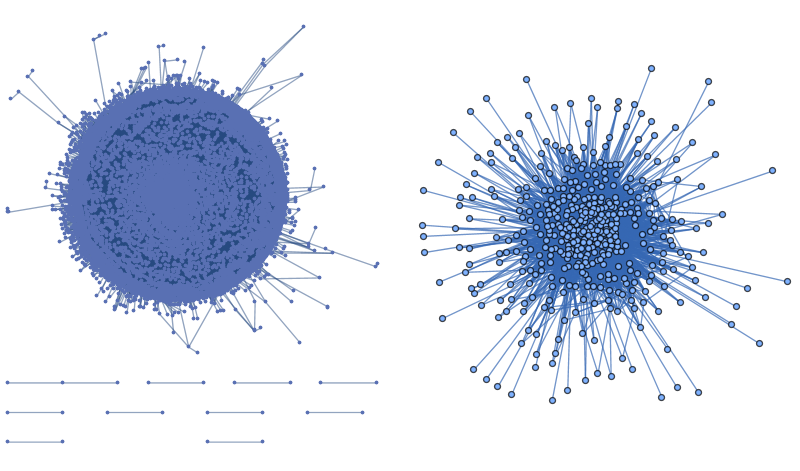

In [8]:
GraphicsGrid[Partition[Table[{GraphPlot[graph1], GraphPlot[graph2]}], 2]]

In [ ]:
partition[g_] := Module[{vertex, u, v, c, list},
  vertex = VertexList[g]; 
  u = {};
  v = {};
  c = Complement[vertex, Join[u, v]]; (* Vértices que no están en u ni en v *)
  
  While[c != {}, (* Mientras haya vértices no asignados *)
    list = GraphDistance[g, c[[1]]]; (* Distancias de c[[1]] a todos los vértices *)
    
    (* Iteramos sobre la lista de distancias *)
    For[j = 1, j <= Length[list], j++,
      If[NumericQ[list[[j]]], (* Verificamos si la distancia es numérica *)
        If[EvenQ[list[[j]]], 
          AppendTo[u, vertex[[j]]], (* Si la distancia es par, lo asignamos a u *)
          AppendTo[v, vertex[[j]]]  (* Si la distancia es impar, lo asignamos a v *)
        ]
      ]
    ];
    
    c = Complement[vertex, Join[u, v]] (* Actualizamos c con los vértices no asignados *)
  ];
  
  {u, v} (* Devolvemos los dos conjuntos de vértices *)
]

In [ ]:
projections[graph_, setUorV_] :=
  Module[{set, l,projectedGraph, list, list1, added, list2},
  
    set = Switch[setUorV,
      U, partition[graph][[1]],
      V, partition[graph][[2]]
    ];
    l = Length[set];
    projectedGraph = Graph[{}];
    (* Lista de vecinos de cada vértice del conjunto seleccionado *)
    list = AdjacencyList[graph, #] & /@ set;
    (* Itera sobre cada vértice en el conjunto seleccionado (set). *)
    For[i = 1, i <= l, i++,
      
      list1 = list[[i]];
      added = False;
      
      (* Verifica si hay intersección entre vecinos de i y j *)
      For[j = i + 1, j <= l, j++,
        list2 = list[[j]];
        
          If[Intersection[list1, list2] != {},
            projectedGraph = EdgeAdd[projectedGraph, set[[i]] <-> set[[j]]];
            added = True
          ]
        
      ];
      
      (* Si el vértice no fue conectado a nadie, se agrega como nodo aislado *)
      If[!added,
        projectedGraph = VertexAdd[projectedGraph, set[[i]]]
      ]
    ];
    
    projectedGraph
  ]

In [ ]:
par = partition[graph2];
RandomSample[par[[1]], 2]
RandomSample[par[[2]], 2]
Length[par[[1]]]
Length[par[[2]]]

In [ ]:
graph2U = projections[graph2, U]; (*GroupedJob*)

In [ ]:
graph2V = projections[graph2, V]; (*GroupedSalary*)

In [ ]:
Export["projection_salary(grouped_log(128)).graphml", graph2V]

In [ ]:
N[GraphDensity[graph2V]]
GraphPlot[graph2V]